In [1]:
!pip install timm

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/OOD_2/
!ls

Mounted at /content/drive
/content/drive/MyDrive/OOD_2
checkpoints_mobilenet	hmnist_28_28_RGB.csv		     OOD_analysis_notebook.ipynb
checkpoints_resnet	hmnist_8_8_L.csv		     __pycache__
CustomImageDataset.py	hmnist_8_8_RGB.csv		     resnet50_based_classifier.pth
evaluate_with_mcd.py	ISIC2018_Task3_Test_GroundTruth.csv  resnet50_epoch_1.pth
ham10000_images_part_1	ISIC2018_Task3_Test_Images	     test_model.py
HAM10000_images_part_1	ISIC2018_Task3_Test_Images.zip	     test_notebook.ipynb
HAM10000_images_part_2	mobilenetv3b64_epoch_10.pth	     train_model.py
HAM10000_metadata.csv	model.pth			     train_notebook.ipynb
hmnist_28_28_L.csv	models


In [3]:

from models.SkinLesionLightClassifier import SkinLesionLightClassifier
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader

from CustomImageDataset import CustomImageDataset
from test_model import test_model

In [4]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 16
# percentage of training set to use as validation
valid_size = 0.3
# use a gpu if one is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
path_HAM10000 = ''

In [6]:
test_data = pd.read_csv(path_HAM10000 + 'ISIC2018_Task3_Test_GroundTruth.csv')
test_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAMTEST_0000000,ISIC_0034524,nv,follow_up,40.0,female,back,vidir_molemax
1,HAMTEST_0000001,ISIC_0034525,nv,histo,70.0,male,abdomen,rosendahl
2,HAMTEST_0000002,ISIC_0034526,bkl,histo,70.0,male,back,rosendahl
3,HAMTEST_0000003,ISIC_0034527,nv,histo,35.0,male,trunk,vienna_dias
4,HAMTEST_0000004,ISIC_0034528,nv,follow_up,75.0,female,trunk,vidir_molemax


In [7]:
classes = {5: ('nv', ' melanocytic nevi'), 4: ('mel', 'melanoma'), 2: ('bkl', 'benign keratosis-like lesions'),
           1: ('bcc', ' basal cell carcinoma'), 6: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'), 3: ('df', 'dermatofibroma')}
label_dict = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [8]:
test_img_names = pd.DataFrame(test_data['image_id'])

In [9]:
test_img_names[test_img_names["image_id"] == "ISIC_0035068"]

,image_id
534,ISIC_0035068


Feature batch shape: 16
Labels batch shape: 16


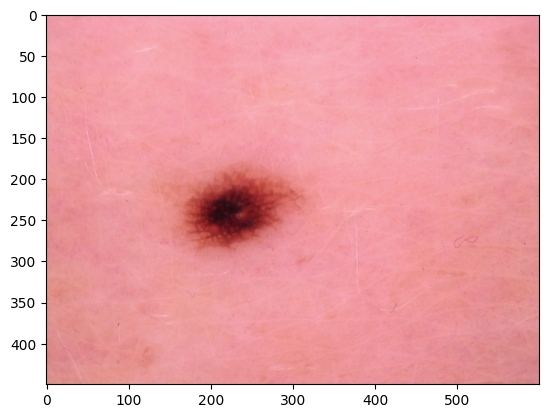

Label: 5


' print(f"Label: {label}")\nprint(data[data[\'image_id\'] == name]) '

In [10]:
test_data.drop(axis=0, index=534, inplace=True)
test_img_labels = pd.DataFrame(test_data['dx'])
test_img_names = pd.DataFrame(test_data['image_id'])

test_dataset = CustomImageDataset(test_data, img_dir='ISIC2018_Task3_Test_Images',
                                  transform=[])
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
test_features, test_labels = next(iter(test_loader))
print(f"Feature batch shape: {len(test_features)}")
print(f"Labels batch shape: {len(test_labels)}")
img = test_features[0].squeeze()
disease_label = test_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

print(f"Label: {disease_label}")
""" print(f"Label: {label}")
print(data[data['image_id'] == name]) """

In [11]:
model = SkinLesionLightClassifier(7)
model.load_state_dict(torch.load(path_HAM10000 + 'checkpoints_mobilenet/final_model.pth'), strict=False)
model.to(device)
model.eval()
with torch.no_grad():
  test_model(model, test_loader, device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


###################
# test the model # 
###################
Test Loss: 0.9834389255427115 	Test Accuracy: 0.6532098054885864
